# **Exploratory Data Analysis & Intro**

**Goal** </p>
1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

**Final Deliverables:**
- Create Jupyter Notebookss (showcasing core skills in Python).
- Create a summary page (via README.md) capturing your findings.
- Share this project via GitHub & LinkedIn.

**Questions to Answer**
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying) </d>

*I'll be focusing on US Data Analyst roles, and Indonesia:*

##### **Exploratory Data Analysis for all Data Roles**

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Hani\anaconda3\envs\python_project1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Roles to Explore**

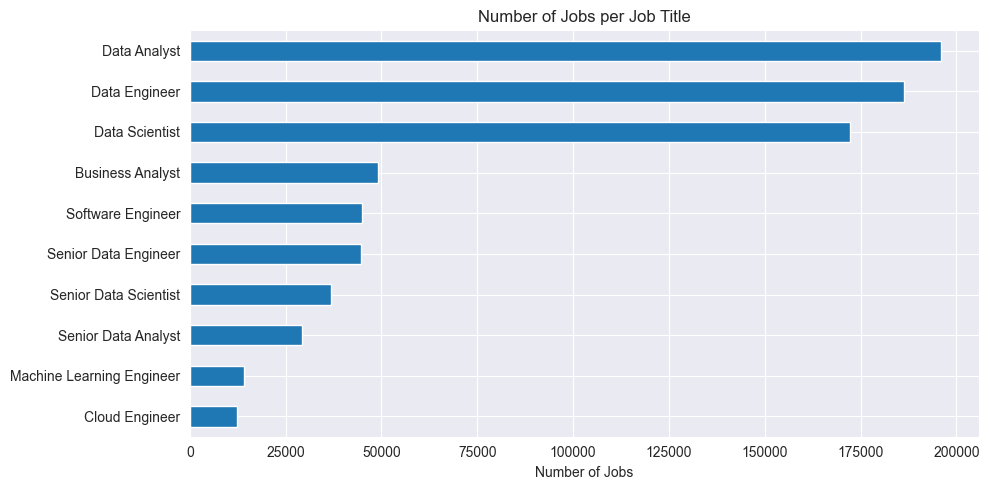

In [2]:

df_roles = df.pivot_table(index ='job_title_short', aggfunc = 'size').sort_values(ascending= True)

sns.set_style('darkgrid')
fig, ax = plt.subplots (figsize= (10,5))

df_roles.plot (kind= 'barh')

#sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()

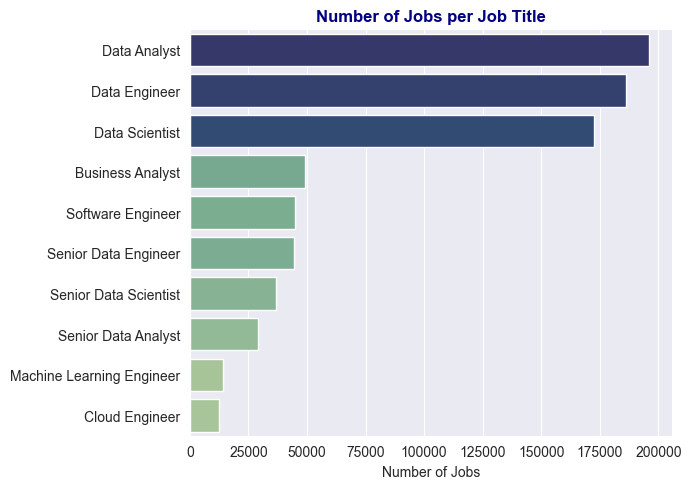

In [3]:

# Buat pivot table dan urutkan dari kecil ke besar
df_roles = df.pivot_table(index='job_title_short', aggfunc='size').sort_values(ascending = False)

# Konversi Series ke DataFrame agar bisa digunakan di Seaborn
df_roles = df_roles.reset_index().rename(columns={0: 'count', 'job_title_short': 'role'})

sns.set_style('darkgrid')
fig, ax = plt.subplots (figsize= (7,5))

sns.barplot(data=df_roles, x='count', y='role', hue='count', palette='crest', legend='')

#sns.despine()
plt.title('Number of Jobs per Job Title', color = 'navy', fontweight = 'bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Countries to Explore**

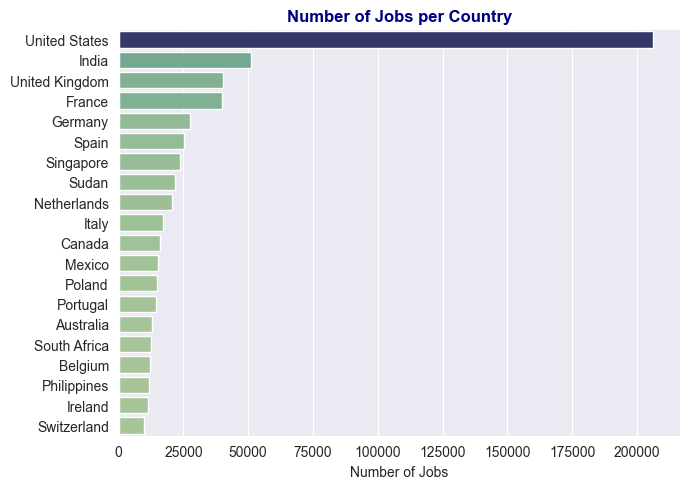

In [4]:
# Buat pivot table dan urutkan dari kecil ke besar
df_country = df.pivot_table(index='job_country', aggfunc='size').sort_values(ascending = False).head(20)

# Konversi Series ke DataFrame agar bisa digunakan di Seaborn
df_country = df_country.reset_index().rename(columns={0: 'count', 'job_country': 'country'})

sns.set_style('darkgrid')
fig, ax = plt.subplots (figsize= (7,5))

sns.barplot(data=df_country, x='count', y='country', hue='count', palette='crest', legend= '')

#sns.despine()
plt.title('Number of Jobs per Country', color = 'navy', fontweight = 'bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Company to Explore**

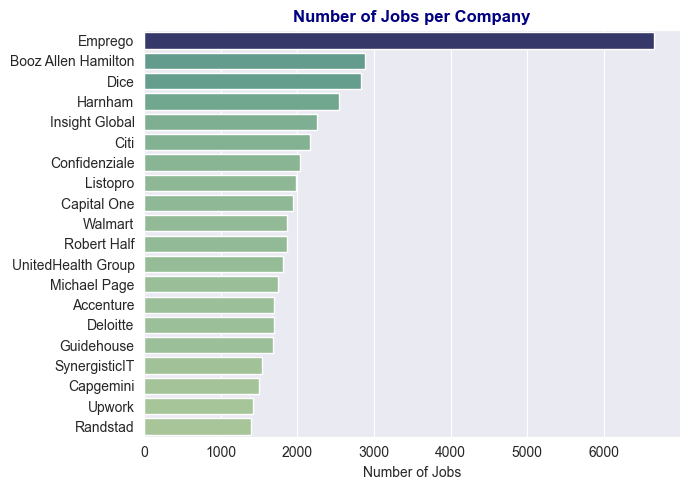

In [5]:
# Buat pivot table dan urutkan dari kecil ke besar
df_company = df.pivot_table(index='company_name', aggfunc='size').sort_values(ascending = False).head(20)

# Konversi Series ke DataFrame agar bisa digunakan di Seaborn
df_company = df_company.reset_index().rename(columns={0: 'count', 'company_name': 'company'})


sns.set_style('darkgrid')
fig, ax = plt.subplots (figsize= (7,5))

sns.barplot(data=df_company, x='count', y='company', hue='count', legend= '', palette='crest')

#sns.despine()
plt.title('Number of Jobs per Company', color = 'navy', fontweight = 'bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Job Opportunities**

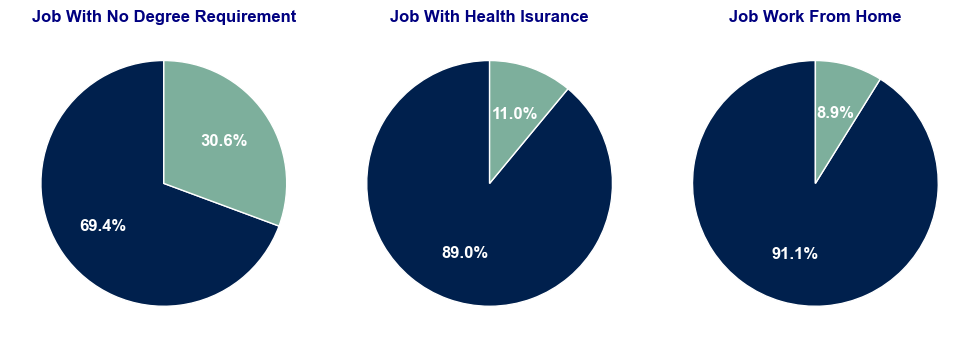

In [6]:
no_degree = df['job_no_degree_mention'].value_counts()
health_isurance = df['job_health_insurance'].value_counts()
work_from_home = df['job_work_from_home'].value_counts()
colors = sns.color_palette(["#00204D", "#7DAF9C"])

dict_column = {
    "Job With No Degree Requirement" : no_degree,
    "Job With Health Isurance": health_isurance,
    "Job Work From Home" : work_from_home
}
sns.set_style('darkgrid')
fig, axes = plt.subplots (1,3,figsize= (10,5))

for i, (title, data) in enumerate (dict_column.items()):
    data.plot (
        kind = 'pie',
        ax=axes[i] ,
        labels=['False', 'True'], 
        colors=colors ,
        autopct='%1.1f%%', 
        startangle=90,
        textprops={'color': 'white', 'fontsize': 12, 'weight': 'bold'} )   
    
    axes[i].set_ylabel('')
    axes [i].set_title(title, fontweight='bold', color='navy')

plt.tight_layout()
plt.show()

##### **Exploratory Data Analysis for Data Analysts in the US**

In [7]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**Filter for US Data Analyst roles**

In [8]:
df_DA_USA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

# Konversi Series ke DataFrame agar bisa digunakan di Seaborn
#df_DA_USA = df_DA_USA.reset_index().rename(columns={0: 'count', 'job_location': 'location'})

(df_DA_USA)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [ ]:
df_DA_USA_pivot = df_DA_USA.pivot_table(index='job_location', aggfunc = 'size').sort_values(ascending = False).head(10)

#Konversi Series ke DataFrame agar bisa digunakan di Seaborn
df_DA_USA_pivot = df_DA_USA_pivot.reset_index().rename(columns={0: 'count', 'job_location': 'location'})
df_DA_USA_pivot


,location,count
0,Anywhere,5106
1,"New York, NY",3035
2,"Atlanta, GA",2741
3,"Chicago, IL",2337
4,"Austin, TX",1919
5,"Dallas, TX",1862
6,"Washington, DC",1592
7,"Charlotte, NC",1433
8,"Tampa, FL",1431
9,"Los Angeles, CA",1328


**Locations to Explore:**

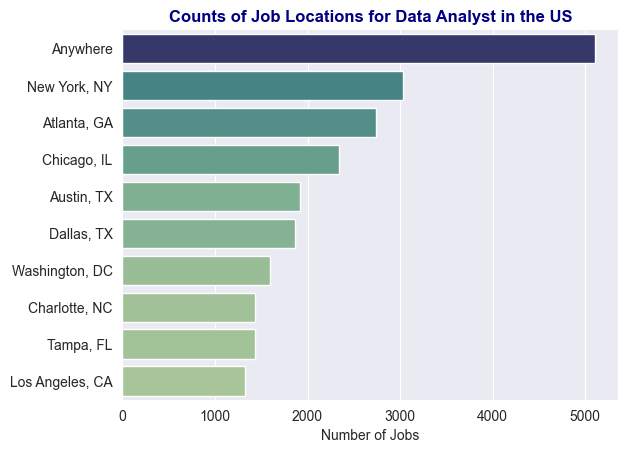

In [27]:

sns.set_style('darkgrid')
sns.barplot(data= df_DA_USA_pivot, x='count', y='location', hue='count', palette='crest', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US', color= 'navy', fontweight= 'bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


**Job Opportunities**

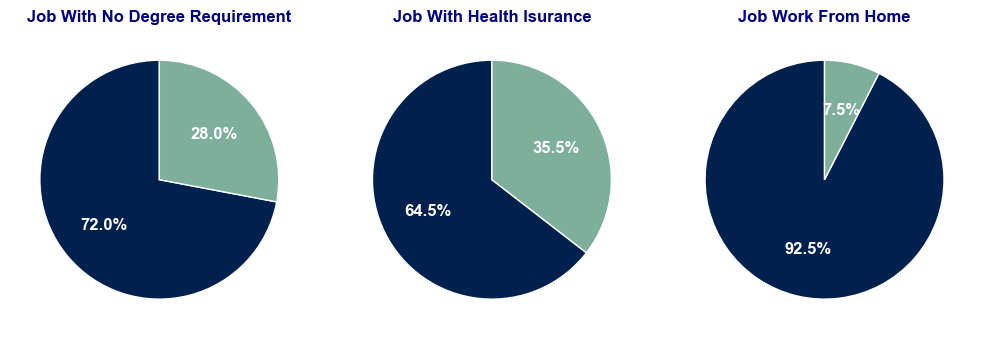

In [31]:
no_degree = df_DA_USA['job_no_degree_mention'].value_counts()
health_isurance = df_DA_USA['job_health_insurance'].value_counts()
work_from_home = df_DA_USA['job_work_from_home'].value_counts()
colors = sns.color_palette(["#00204D", "#7DAF9C"])

dict_column = {
    "Job With No Degree Requirement" : no_degree,
    "Job With Health Isurance": health_isurance,
    "Job Work From Home" : work_from_home
}
sns.set_style('darkgrid')
fig, axes = plt.subplots (1,3,figsize= (10,5))

for i, (title, data) in enumerate (dict_column.items()):
    data.plot (
        kind = 'pie',
        ax=axes[i] ,
        labels=['False', 'True'], 
        colors=colors ,
        autopct='%1.1f%%', 
        startangle=90,
        textprops={'color': 'white', 'fontsize': 12, 'weight': 'bold'} )   
    
    axes[i].set_ylabel('')
    axes [i].set_title(title, fontweight='bold', color='navy')

plt.tight_layout()
plt.show()

**Companies to Explore:**

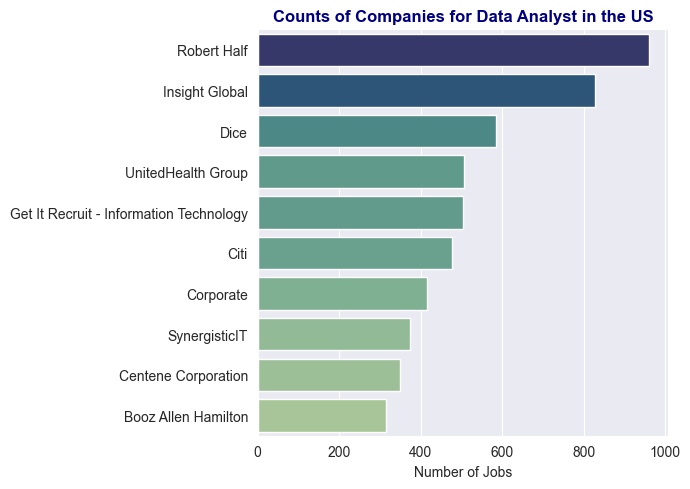

In [35]:
# Buat pivot table dan urutkan dari kecil ke besar
df_DA_USA_company = df_DA_USA.pivot_table(index='company_name', aggfunc='size').sort_values(ascending = False).head(10)

# Konversi Series ke DataFrame agar bisa digunakan di Seaborn
df_DA_USA_company = df_DA_USA_company.reset_index().rename(columns={0: 'count', 'company_name': 'company'})


sns.set_style('darkgrid')
fig, ax = plt.subplots (figsize= (7,5))

sns.barplot(data=df_DA_USA_company, x='count', y='company', hue='count', legend= '', palette='crest')

#sns.despine()
plt.title('Counts of Companies for Data Analyst in the US', color = 'navy', fontweight = 'bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()